# Video Game Sales Prediction
---
## Problem Statement
(Fill in later)

### Load Libraries & Data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
video_games = pd.read_csv('../data/train.csv')
video_games.head()

,name,platform,genre,publisher,developer,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
0,Warriors Orochi 3,XOne,Action,Tecmo Koei,unknown,E,2014.0,0.01,0.03,0.00,0.00,0.04,68.997119,26.440992,7.1269,163.008846
1,Shooter: Starfighter Sanvein,PS,Shooter,Midas Interactive Entertainment,unknown,E,2000.0,0.01,0.01,0.00,0.00,0.02,68.997119,26.440992,7.1269,163.008846
2,CIMA: The Enemy,GBA,Role-Playing,Marvelous Interactive,Neverland,E,2003.0,0.02,0.01,0.00,0.00,0.03,70.000000,11.000000,7.1269,163.008846
3,Borderlands: The Pre-Sequel,PS3,Shooter,Take-Two Interactive,2K Australia,M,2014.0,0.26,0.21,0.05,0.10,0.61,77.000000,24.000000,6.3000,130.000000
4,Destiny,XOne,Shooter,Activision,"Bungie Software, Bungie",T,2014.0,2.14,0.92,0.00,0.31,3.37,75.000000,11.000000,5.5000,1735.000000


## Exploratory Data Analysis

In [41]:
# summary stats
video_games.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,13132.0,2006.476927,5.870107,1980.00,2003.000000,2007.000000,2010.000000,2020.00
na_sales,13132.0,0.261324,0.759059,0.00,0.000000,0.080000,0.240000,29.08
eu_sales,13132.0,0.143377,0.444829,0.00,0.000000,0.020000,0.110000,12.76
jp_sales,13132.0,0.076963,0.303524,0.00,0.000000,0.000000,0.040000,10.22
other_sales,13132.0,0.047393,0.182391,0.00,0.000000,0.010000,0.030000,10.57
global_sales,13132.0,0.529335,1.407986,0.01,0.060000,0.170000,0.470000,40.24
critic_score,13132.0,68.948415,9.748670,13.00,68.997119,68.997119,70.000000,98.00
critic_count,13132.0,26.370281,13.213159,3.00,22.000000,26.440992,26.440992,113.00
user_score,13132.0,7.125527,1.018175,0.00,7.126900,7.126900,7.300000,9.60
user_count,13132.0,163.504669,382.620981,4.00,30.000000,163.008846,163.008846,10665.00


Global sales ranges very wildly. Most games fall around 0.53 million in global sales.

The zeros in the country specific sales features must mean there were no sales for some games in those countries.

In [42]:
# Correlation to target variable (global sales)
video_games.corr()[['global_sales']]

,global_sales
year_of_release,-0.096903
na_sales,0.927737
eu_sales,0.868250
jp_sales,0.637528
other_sales,0.680810
global_sales,1.000000
critic_score,0.222322
critic_count,0.263357
user_score,0.076952
user_count,0.244437


North American sales and European sales are highly positvely correlated to global sales. Japanese and Other sales are slighly lower postively correlated, but still pretty high. The year of release is slightly negatively correlated to the global sales. The critic score is more positively correlated with global sales than the user score. critic count and user count are more positively correlated than the critic score.

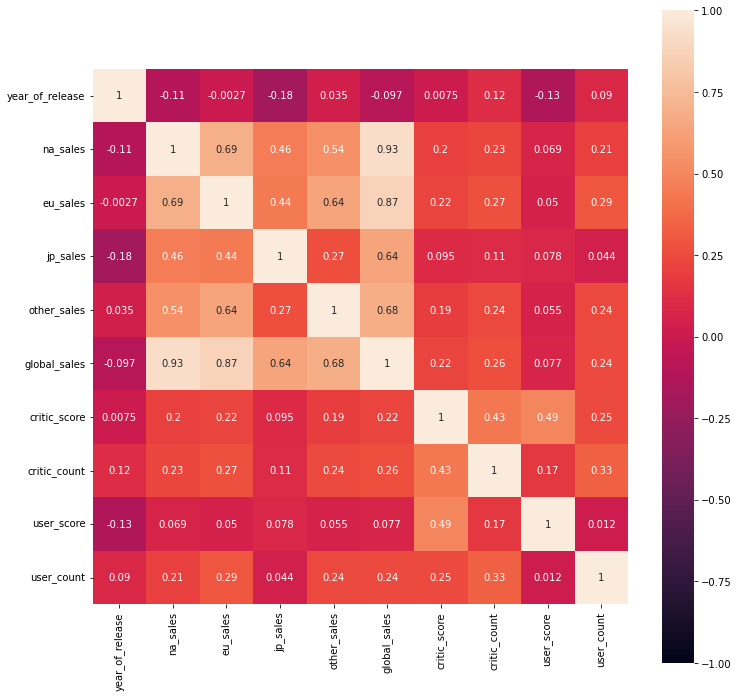

In [43]:
plt.figure(figsize=(12, 12))
sns.heatmap(data=video_games.corr(), vmin=-1, vmax=1, annot=True, square=True);

North american sales has a pretty high postive correlation to European sales. European sales has a pretty high postive correlation to Other sales. May be some collinearity present betwen those features

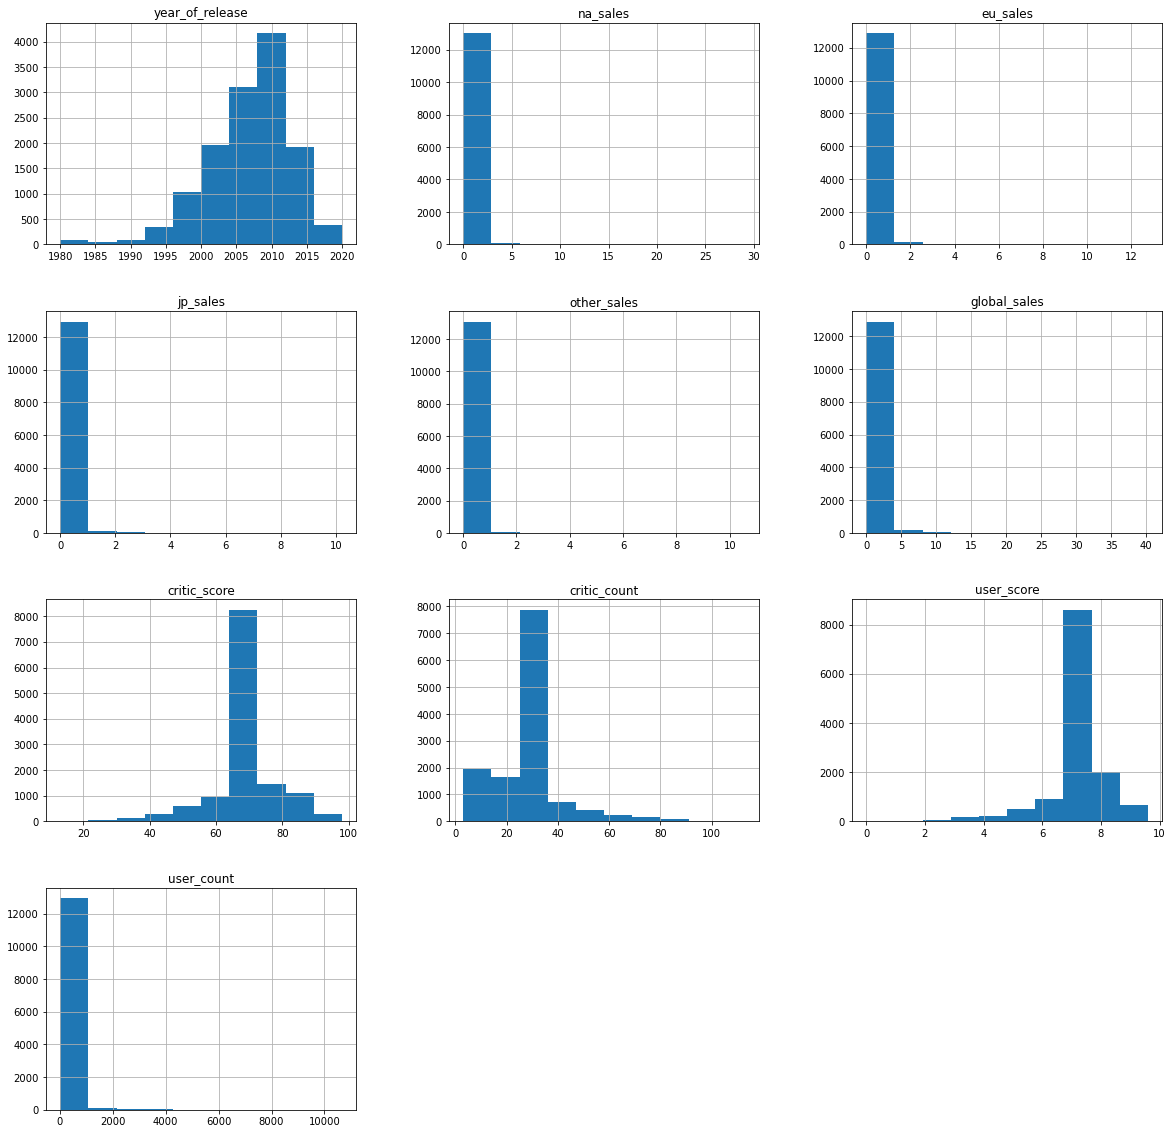

In [44]:
# Histogram of all numeric features
video_games.hist(figsize=(20, 20));

All numeric features are skewed. Most games in the dataset were released in around 2010. North American sales are mostly 3 million dollars or less. European, Japanese, and Other sales sales are mostley 1.5 million dollars or less. Most users scores for games are between 6 and 9 out of 10. Most critic scores are between 60 to 80 out of 100.

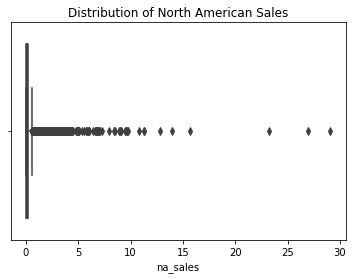

In [45]:
# Boxplot on NA sales
sns.boxplot(data=video_games['na_sales'], x=video_games['na_sales']).set(title='Distribution of North American Sales');

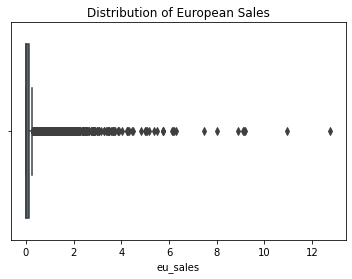

In [46]:
# Boxplot on EU sales
sns.boxplot(data=video_games['eu_sales'], x=video_games['eu_sales']).set(title='Distribution of European Sales');

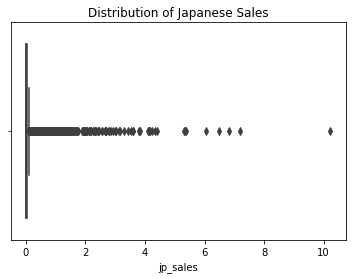

In [47]:
# Boxplot on Japanese sales
sns.boxplot(data=video_games['jp_sales'], x=video_games['jp_sales']).set(title='Distribution of Japanese Sales');

A lot of outlier games for North American, Japanese, and European sales.

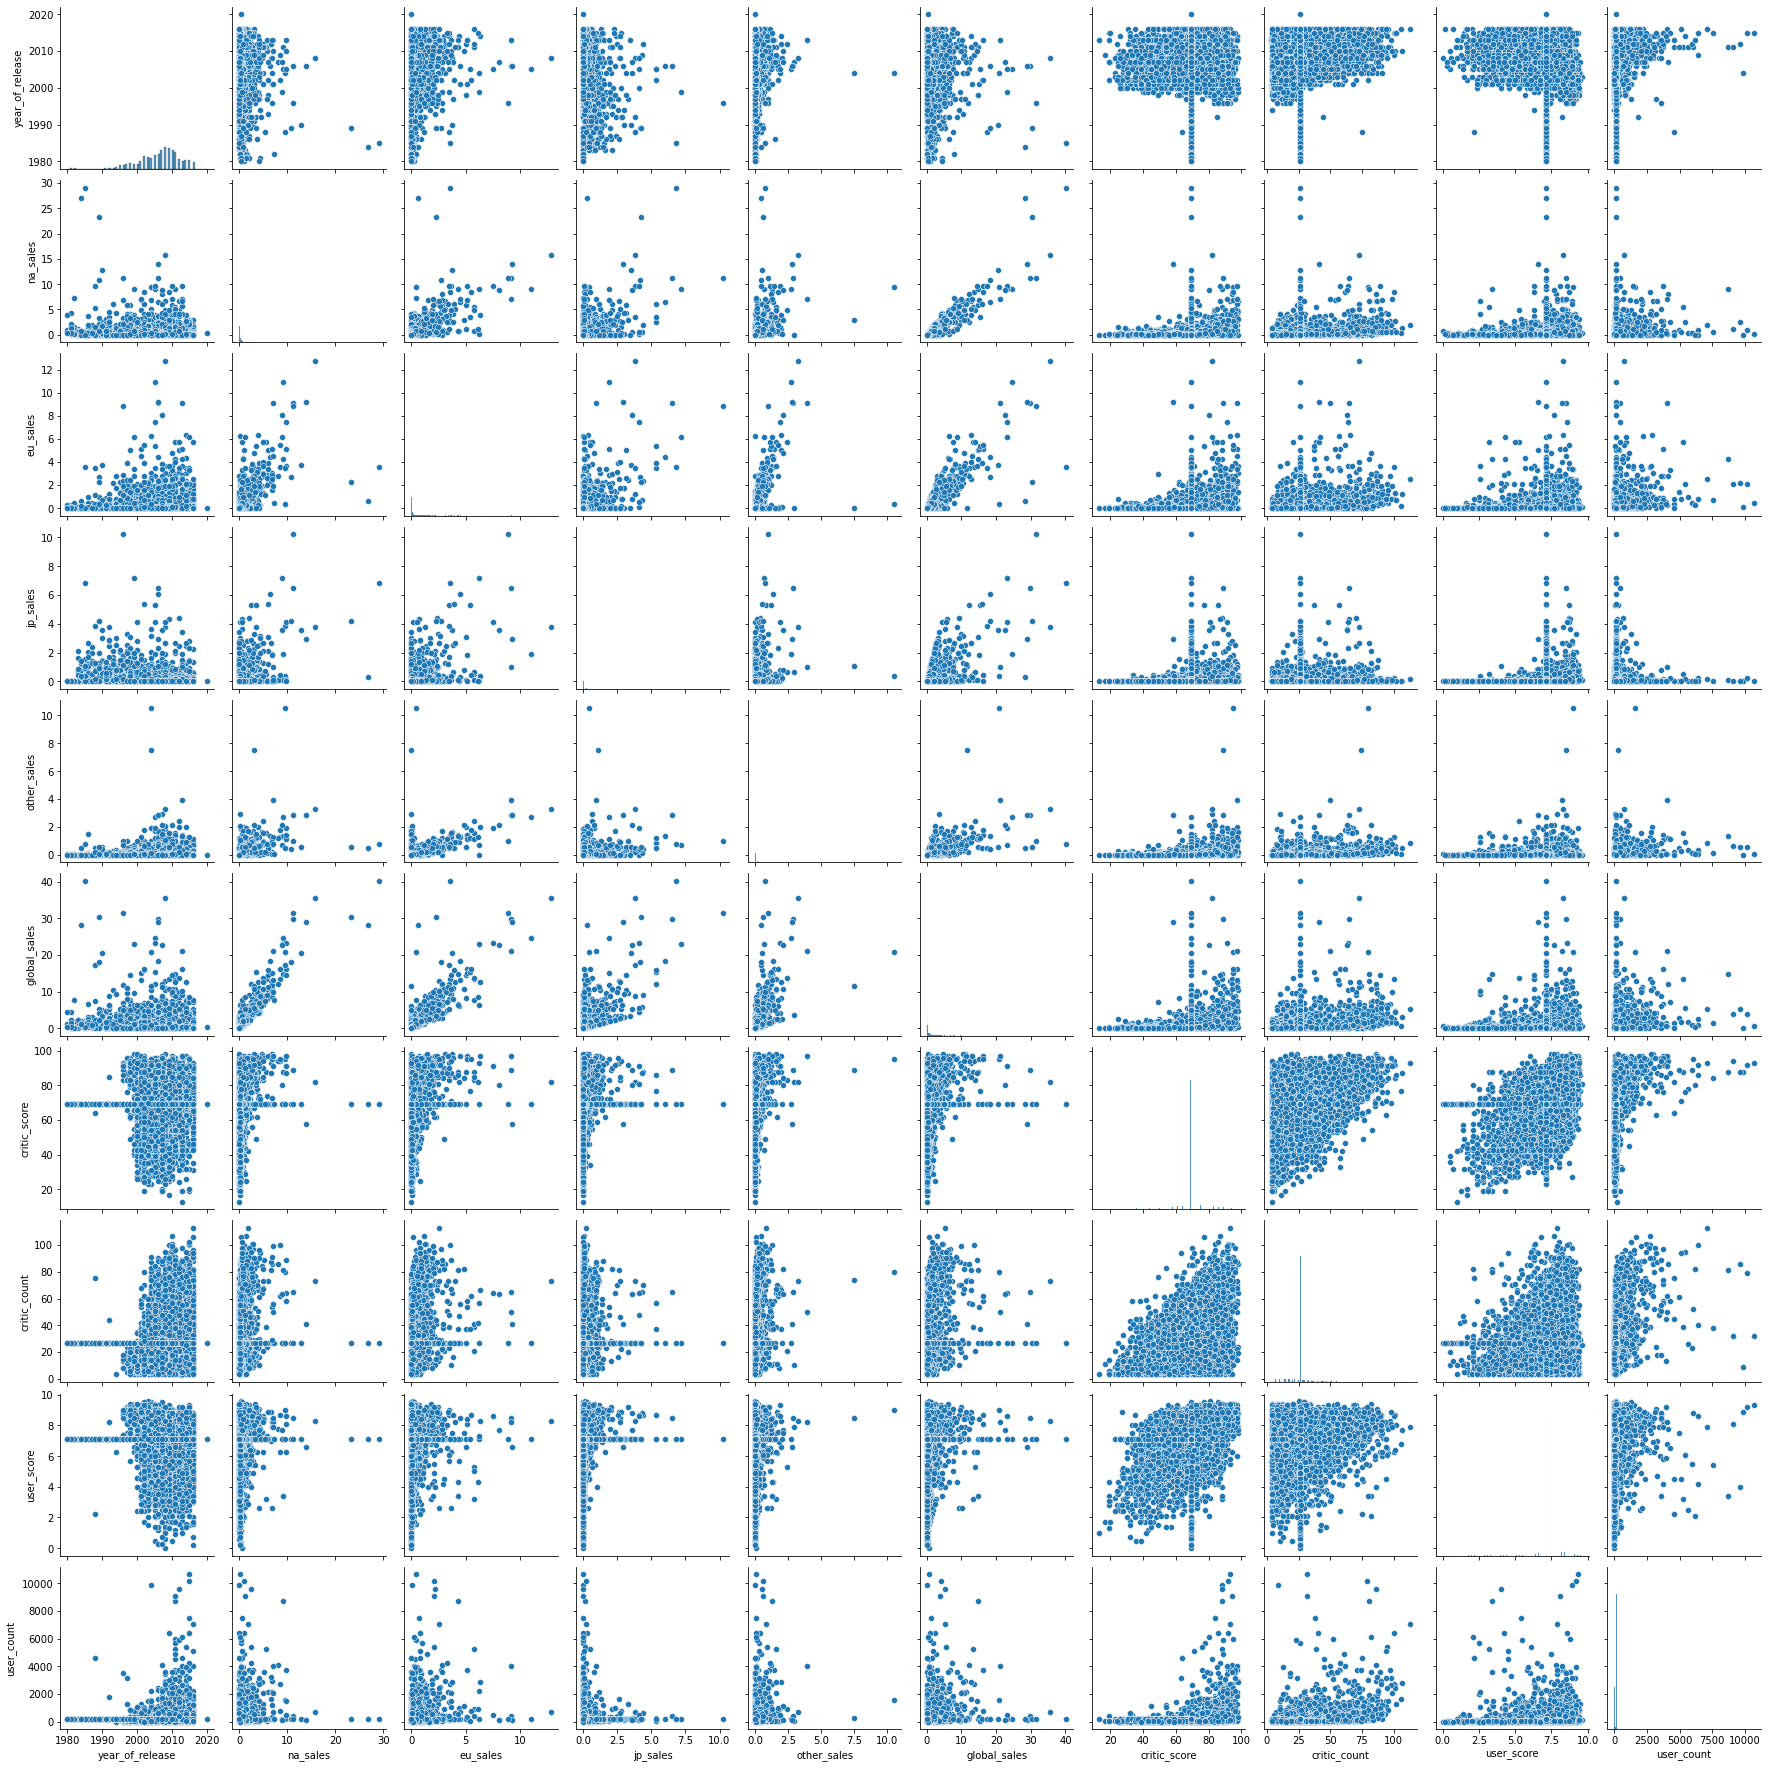

In [48]:
sns.pairplot(data=video_games);

European and North American sales have a slight linear relationship; There might be some collinearity there. Global sales and North American sales have a strong linear relationship with European sales coming in as a close second. European Sales and Other Sales have a pretty strong linear relationship; There might be some collinearity there.

As the critic score goes up the global sales tend to go up; it has a slight exponential relationship. The same relationship is present with the user score and global sales.

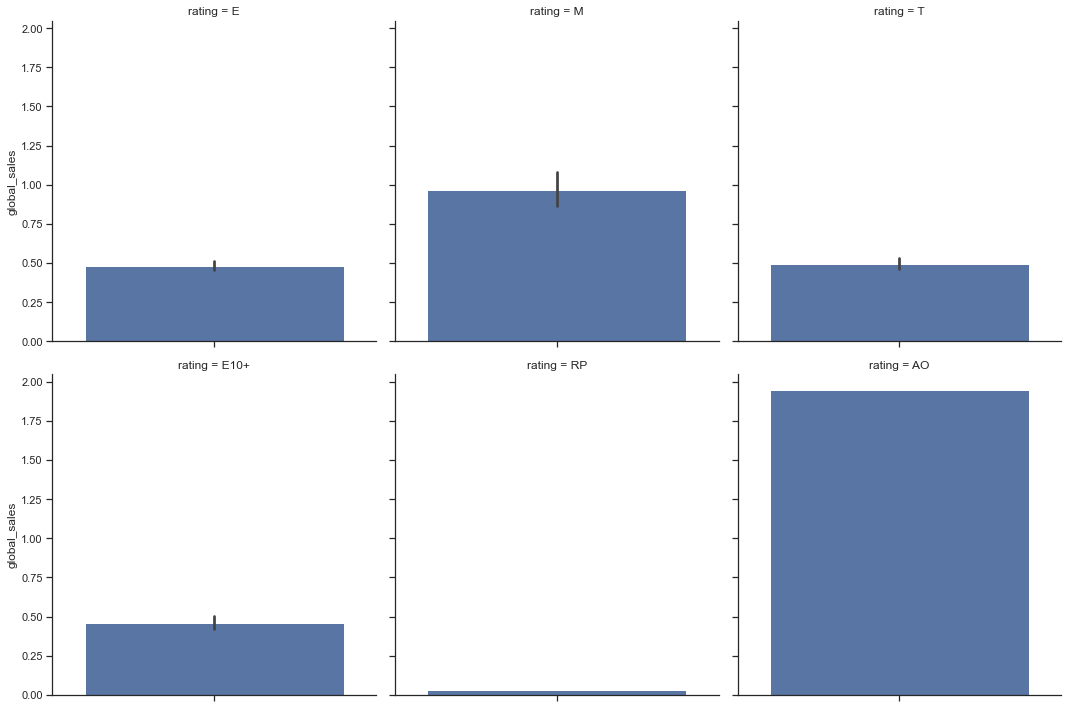

In [52]:
# check which rating has the most global sales sales
sns.catplot(data=video_games, y='global_sales', col='rating', kind='bar', col_wrap=3);

Adult only content has the highest amount of global sales followed by Mature content.

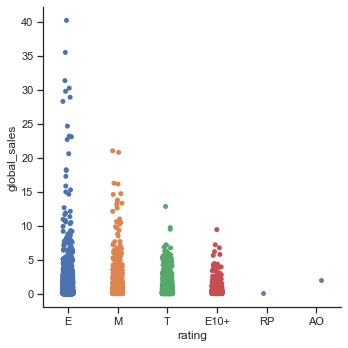

In [53]:
# Look at the distribution of global sales for each rating
sns.catplot(data=video_games, x='rating', y='global_sales');

E rated games have a wider distribution of global sales followed by M rated

In [66]:
video_games['developer'].value_counts()[:10]

unknown             5200
Ubisoft              158
EA Sports            141
Konami               128
EA Canada            128
Capcom               114
EA Tiburon            80
Ubisoft Montreal      79
Visual Concepts       78
Electronic Arts       74
Name: developer, dtype: int64

Ubisoft, EA, Konami, Capcom develop the most games

In [67]:
video_games['publisher'].value_counts()

Electronic Arts                 1063
Activision                       779
Namco Bandai Games               763
Ubisoft                          749
Konami Digital Entertainment     658
                                ... 
Answer Software                    1
Inti Creates                       1
Games Workshop                     1
Pacific Century Cyber Works        1
Game Arts                          1
Name: publisher, Length: 548, dtype: int64

EA, Activision, Namco Bandai Games, Ubisoft, and Konami publish the most games

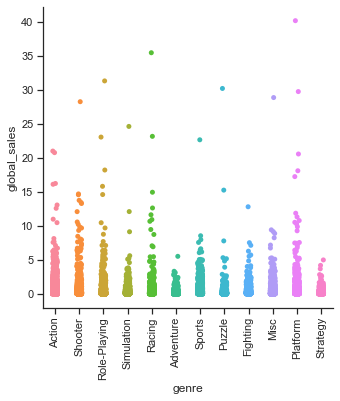

In [76]:
# Look at the distribution of global sales for each genre
g = sns.catplot(data=video_games, x='genre', y='global_sales')
g.set_xticklabels(rotation=90);

Platform games have the widest distribution of global sales. Role playing, Action, and Shooter games have very similar distributions of global sales.

In [77]:
video_games['platform'].value_counts()

PS2     1712
DS      1685
Wii     1024
PS3     1020
X360     976
PS       963
PSP      942
PC       778
XB       636
GBA      627
GC       444
3DS      418
PSV      351
PS4      323
N64      254
SNES     193
XOne     192
SAT      146
WiiU     117
2600      86
GB        81
NES       76
DC        41
GEN       21
NG        10
WS         6
SCD        4
3DO        2
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

PS2, DS, Wii, PS3 have the highest amount of games.

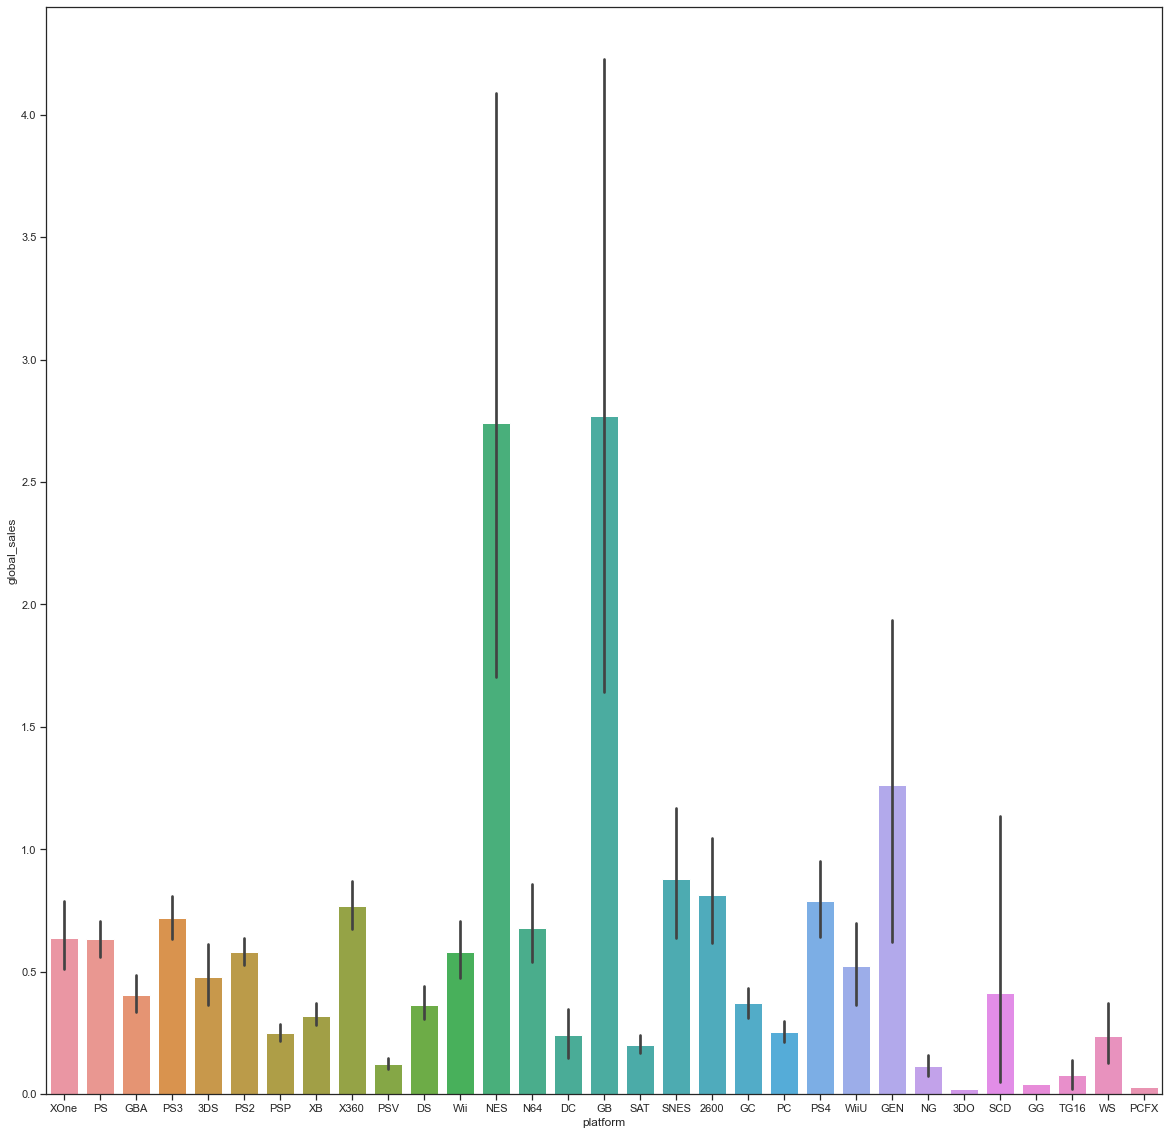

In [81]:
# check which rating has the most global sales sales
plt.figure(figsize=(20,20))
sns.barplot(data=video_games, x='platform', y='global_sales');

Gameboy has the highest global sales, followed by NES, then Sega Genesis.

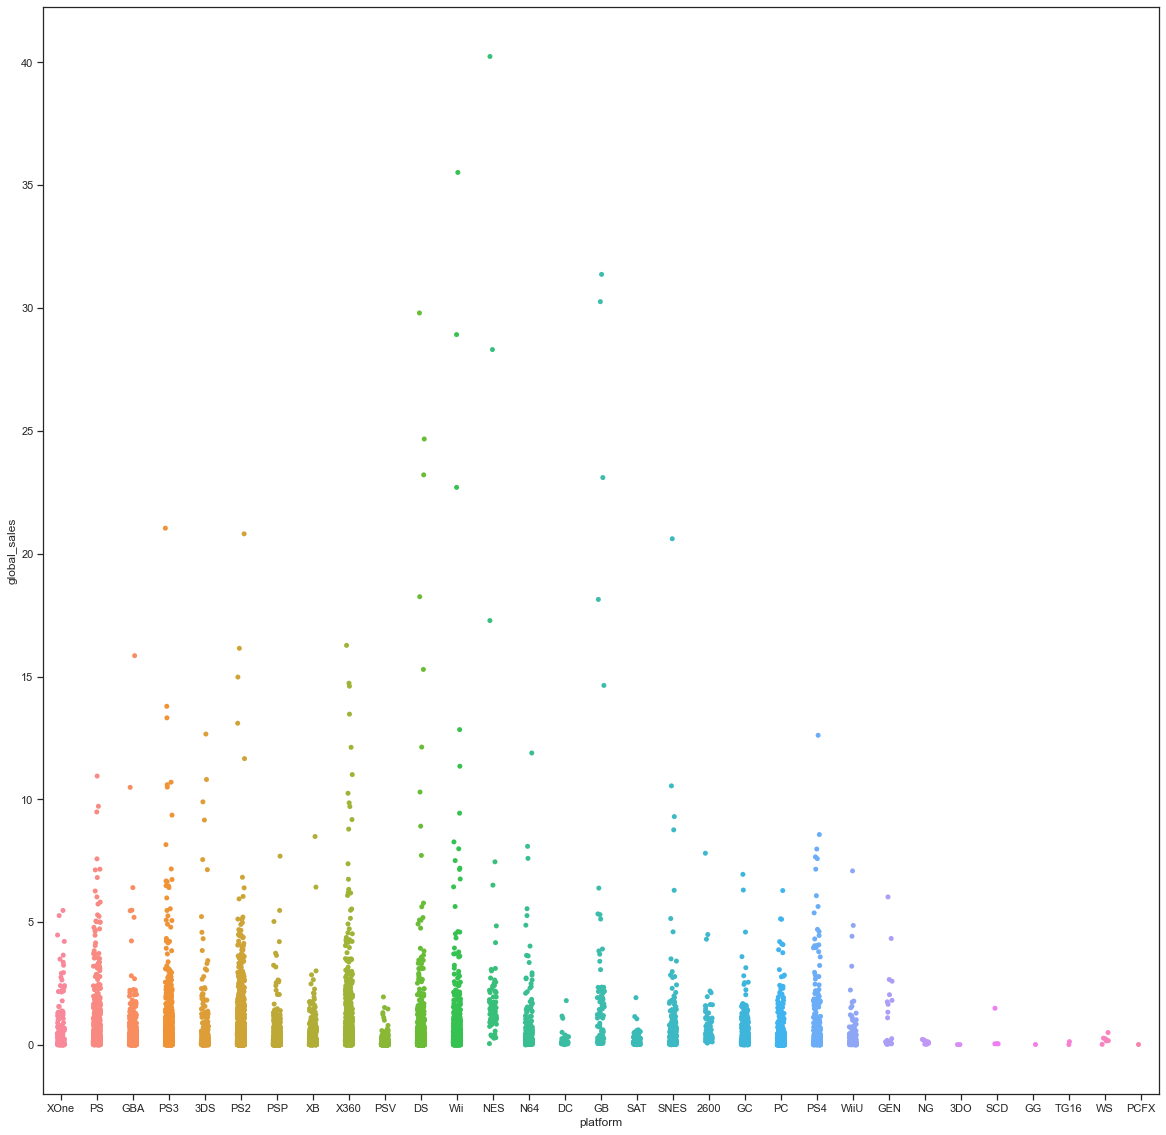

In [82]:
# check which rating has the most global sales sales
plt.figure(figsize=(20,20))
sns.stripplot(data=video_games, x='platform', y='global_sales');

DS, Wii, and NES have a wide distribution across global sales